In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
val_data = pd.read_csv('/content/drive/MyDrive/dataset/val.csv')

# Display the first few rows of each dataset
print("Train Data:")
display(train_data.head())
print("\nTest Data:")
display(test_data.head())
print("\nValidation Data:")
display(val_data.head())

Train Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Test Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500.0,27.0,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,488.0,21.0,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Validation Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,31.0,Male,Instagram,170.0,5.0,80.0,20.0,35.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,877.0,32.0,Female,Instagram,155.0,6.0,75.0,25.0,38.0,Happiness
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Data Overview
print("Train Data Info:")
train_data.info()
print("\nTrain Data Description:")
print(train_data.describe())

# Check for missing values
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   float64
 1   Age                         1000 non-null   float64
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(7), object(3)
memory usage: 156.4+ KB

Train Data Description:
           User_ID          Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
count  1000.000000  1000.000000    

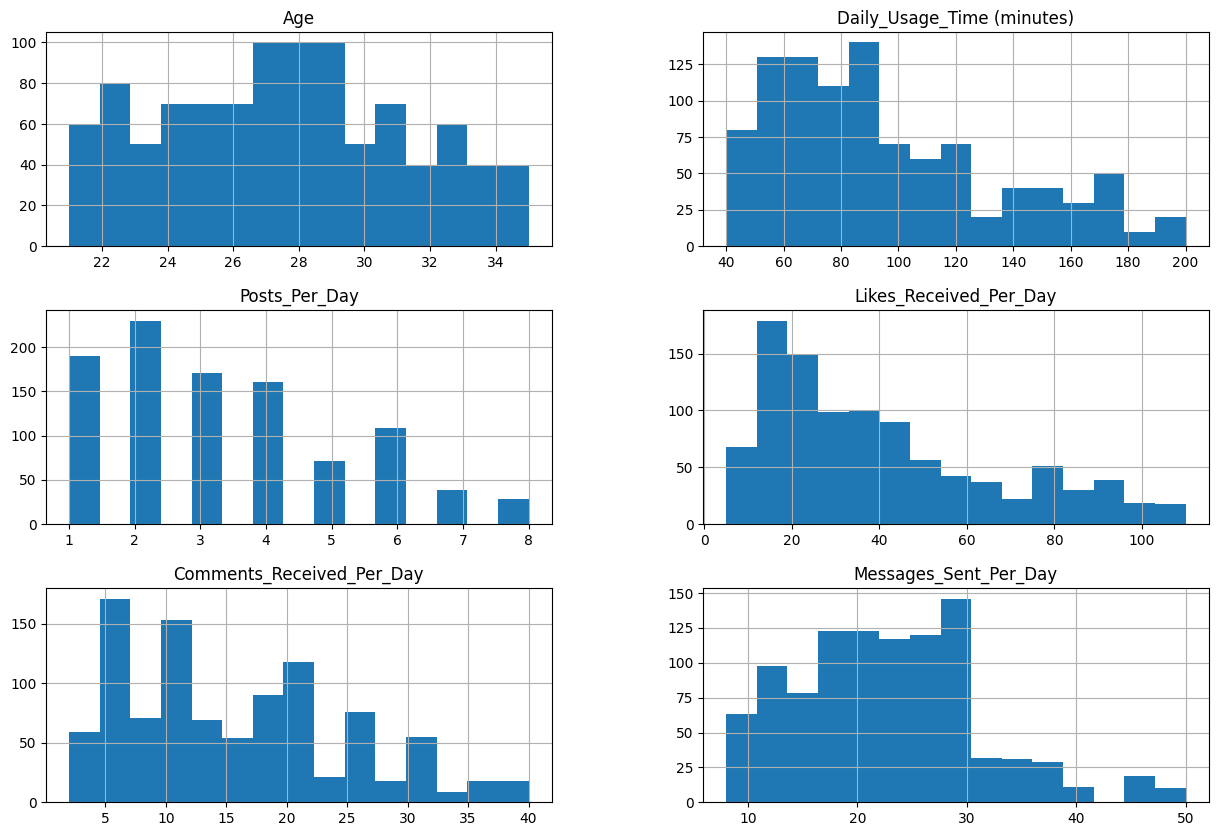

In [ ]:
# Visualize distributions for numerical columns
num_cols = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
            'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

train_data[num_cols].hist(bins=15, figsize=(15, 10))
plt.show()

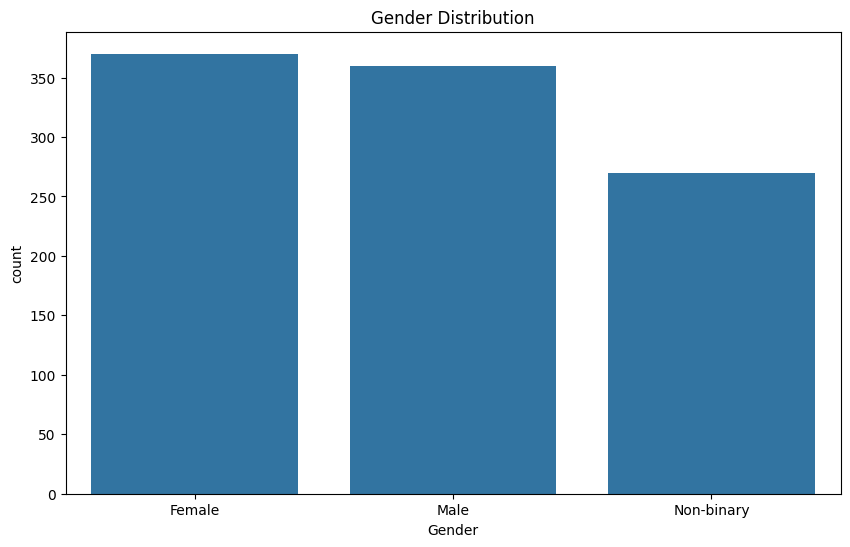

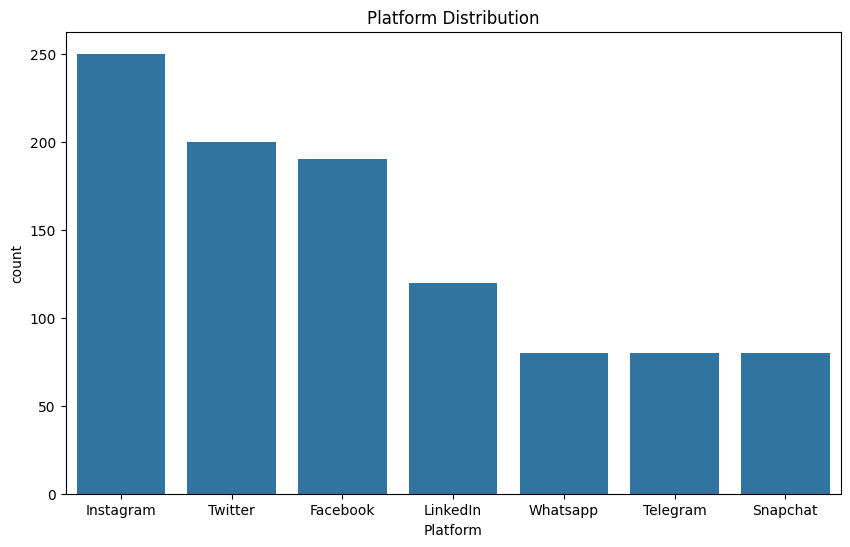

In [ ]:
# Visualize categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Gender')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Platform')
plt.title('Platform Distribution')
plt.show()

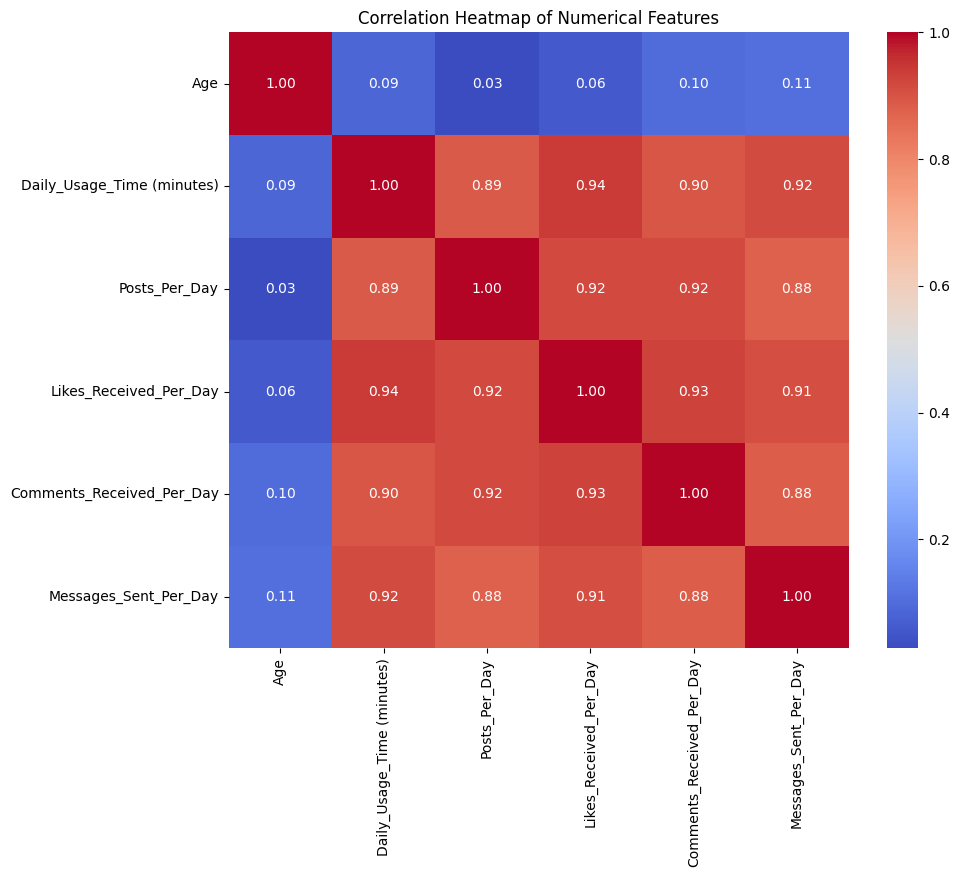

In [ ]:
# Import seaborn for heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical features
correlation_matrix = train_data[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
                                 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
                                 'Messages_Sent_Per_Day']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
# Remove rows with all missing values
train_data = train_data.dropna(how='all').reset_index(drop=True)
test_data = test_data.dropna(how='all').reset_index(drop=True)
val_data = val_data.dropna(how='all').reset_index(drop=True)

# Handle missing values for numerical columns by filling with the median
num_cols = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
            'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
train_data.loc[:, num_cols] = train_data[num_cols].fillna(train_data[num_cols].median())
test_data.loc[:, num_cols] = test_data[num_cols].fillna(test_data[num_cols].median())
val_data.loc[:, num_cols] = val_data[num_cols].fillna(val_data[num_cols].median())

# Handle missing values for categorical columns by filling with the mode
cat_cols = ['Gender', 'Platform', 'Dominant_Emotion']
train_data.loc[:, cat_cols] = train_data[cat_cols].fillna(train_data[cat_cols].mode().iloc[0])
test_data.loc[:, cat_cols] = test_data[cat_cols].fillna(test_data[cat_cols].mode().iloc[0])
val_data.loc[:, cat_cols] = val_data[cat_cols].fillna(val_data[cat_cols].mode().iloc[0])

# Verify that no missing values remain
print("Final Check for Missing Values in Train Data:")
print(train_data.isnull().sum())

Final Check for Missing Values in Train Data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


In [ ]:
# One-hot encode the categorical columns
train_data_encoded = pd.get_dummies(train_data, columns=['Gender', 'Platform', 'Dominant_Emotion'], drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=['Gender', 'Platform', 'Dominant_Emotion'], drop_first=True)
val_data_encoded = pd.get_dummies(val_data, columns=['Gender', 'Platform', 'Dominant_Emotion'], drop_first=True)

# Verify the transformation by displaying the first few rows of the encoded training data
print("Encoded Training Data:")
display(train_data_encoded.head())

Encoded Training Data:


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Dominant_Emotion_Anxiety,Dominant_Emotion_Boredom,Dominant_Emotion_Happiness,Dominant_Emotion_Neutral,Dominant_Emotion_Sadness
0,1.0,25.0,120.0,3.0,45.0,10.0,12.0,False,False,True,False,False,False,False,False,False,False,True,False,False
1,2.0,30.0,90.0,5.0,20.0,25.0,30.0,True,False,False,False,False,False,True,False,False,False,False,False,False
2,3.0,22.0,60.0,2.0,15.0,5.0,20.0,False,True,False,False,False,False,False,False,False,False,False,True,False
3,4.0,28.0,200.0,8.0,100.0,30.0,50.0,False,False,True,False,False,False,False,False,True,False,False,False,False
4,5.0,33.0,45.0,1.0,5.0,2.0,10.0,True,False,False,True,False,False,False,False,False,True,False,False,False


In [ ]:
# Define the feature columns (excluding User_ID and target)
feature_columns = train_data_encoded.columns.drop(['User_ID', 'Dominant_Emotion_Happiness'])  # replace 'Dominant_Emotion_Happiness' with your target

# Define the target column
target_column = 'Dominant_Emotion_Happiness'  # adjust this to your target if different

# Separate features and target for training data
X_train = train_data_encoded[feature_columns]
y_train = train_data_encoded[target_column]

# Similarly, prepare test and validation sets
X_test = test_data_encoded[feature_columns]
y_test = test_data_encoded[target_column]

X_val = val_data_encoded[feature_columns]
y_val = val_data_encoded[target_column]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.9805825242718447

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99        89
        True       0.93      0.93      0.93        14

    accuracy                           0.98       103
   macro avg       0.96      0.96      0.96       103
weighted avg       0.98      0.98      0.98       103


Confusion Matrix:
 [[88  1]
 [ 1 13]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define a function to evaluate a model and print its performance
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)

# Logistic Regression (existing model)
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(logistic_model, X_train, y_train, X_test, y_test, "Logistic Regression")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
evaluate_model(gb_model, X_train, y_train, X_test, y_test, "Gradient Boosting")

# Support Vector Machine
svm_model = SVC(kernel='linear', probability=True, random_state=42)
evaluate_model(svm_model, X_train, y_train, X_test, y_test, "Support Vector Machine (SVM)")


Model: Logistic Regression
Accuracy: 0.9805825242718447
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99        89
        True       0.93      0.93      0.93        14

    accuracy                           0.98       103
   macro avg       0.96      0.96      0.96       103
weighted avg       0.98      0.98      0.98       103

Confusion Matrix:
 [[88  1]
 [ 1 13]]

Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        89
        True       1.00      1.00      1.00        14

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

Confusion Matrix:
 [[89  0]
 [ 0 14]]

Model: Gradient Boosting
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       Fal

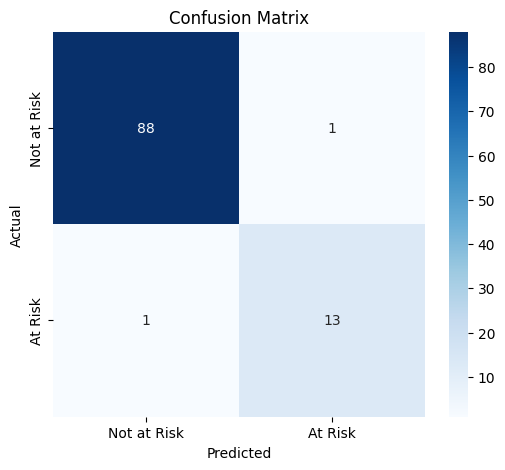

In [ ]:
# Confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not at Risk", "At Risk"], yticklabels=["Not at Risk", "At Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

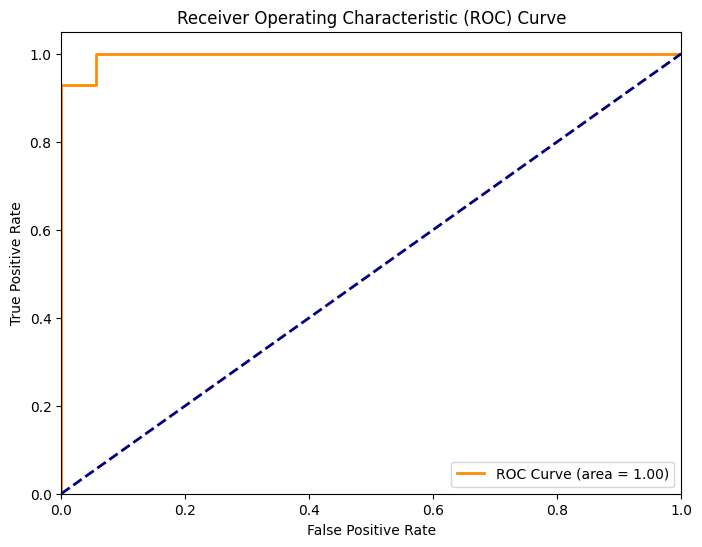

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get probability scores for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Display feature importance for logistic regression
# Assuming 'logistic_model' from the previous cell is your final model
final_model = logistic_model  # Assign your desired final model here

importance = final_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                       Feature  Importance
10           Platform_Snapchat    1.402364
7            Gender_Non-binary    0.859130
8           Platform_Instagram    0.726999
6                  Gender_Male    0.275525
13           Platform_Whatsapp    0.224266
4    Comments_Received_Per_Day    0.120316
1   Daily_Usage_Time (minutes)    0.067473
3       Likes_Received_Per_Day    0.013600
5        Messages_Sent_Per_Day   -0.060106
0                          Age   -0.107740
9            Platform_LinkedIn   -0.297927
12            Platform_Twitter   -0.326023
11           Platform_Telegram   -0.439153
2                Posts_Per_Day   -0.614107
15    Dominant_Emotion_Boredom   -1.190622
17    Dominant_Emotion_Sadness   -3.355385
16    Dominant_Emotion_Neutral   -3.485634
14    Dominant_Emotion_Anxiety   -5.577411


<ipython-input-19-4b6e1fc37be9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


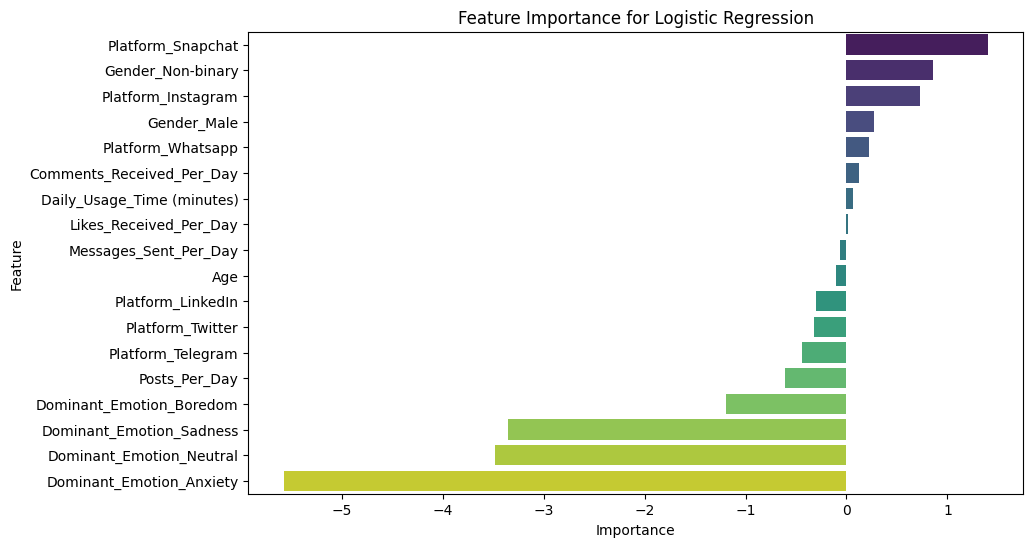

In [ ]:
# Feature importance visualization for logistic regression
import pandas as pd

# Create a dataframe for feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': final_model.coef_[0]
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance for Logistic Regression")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.965 0.97  0.97  0.97  0.97 ]
Average Cross-Validation Score: 0.969


In [ ]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation on each model
def cross_validate_model(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"\nCross-Validation Scores for {model_name}: {scores}")
    print(f"Average Cross-Validation Score for {model_name}: {scores.mean()}")

# Perform cross-validation on each model
cross_validate_model(logistic_model, X_train, y_train, "Logistic Regression")
cross_validate_model(rf_model, X_train, y_train, "Random Forest")
cross_validate_model(gb_model, X_train, y_train, "Gradient Boosting")
cross_validate_model(svm_model, X_train, y_train, "SVM")


Cross-Validation Scores for Logistic Regression: [0.965 0.97  0.97  0.97  0.97 ]
Average Cross-Validation Score for Logistic Regression: 0.969

Cross-Validation Scores for Random Forest: [0.98 1.   1.   1.   1.  ]
Average Cross-Validation Score for Random Forest: 0.9960000000000001

Cross-Validation Scores for Gradient Boosting: [0.985 1.    1.    1.    1.   ]
Average Cross-Validation Score for Gradient Boosting: 0.9969999999999999

Cross-Validation Scores for SVM: [0.97 0.97 0.97 0.97 0.97]
Average Cross-Validation Score for SVM: 0.97


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for regularization strength
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with logistic regression and the parameter grid
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameter and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 100}
Best Cross-Validation Score: 0.9890000000000001


In [ ]:
# Re-train the model with the best parameter
final_model = LogisticRegression(C=100, max_iter=1000)
final_model.fit(X_train, y_train)

# Validate the model
y_val_pred = final_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Set Accuracy:", val_accuracy)
print("\nValidation Set Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nValidation Set Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Validation Set Accuracy: 0.918918918918919

Validation Set Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.94      0.95       120
        True       0.77      0.82      0.79        28

    accuracy                           0.92       148
   macro avg       0.86      0.88      0.87       148
weighted avg       0.92      0.92      0.92       148


Validation Set Confusion Matrix:
 [[113   7]
 [  5  23]]


In [ ]:
!pip install joblib

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression  # Example, replace with your model type
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

# Construct the full path to the model file
model_path = os.path.join(current_directory, "social_media_addiction_model.joblib")

# Check if the file exists
if os.path.exists(model_path):
    # Load the model using the old environment
    model = joblib.load(model_path)

    # Save it again with the current version of scikit-learn
    joblib.dump(model, model_path)
else:
    print(f"Error: Model file not found at {model_path}")
    print("Please ensure that the model has been trained and saved before loading.")

Current working directory: /content
Error: Model file not found at /content/social_media_addiction_model.joblib
Please ensure that the model has been trained and saved before loading.


In [ ]:
import joblib

# Save the final model to Google Drive
joblib.dump(model, '/content/drive/MyDrive/social_media_addiction_model.joblib')

['/content/drive/MyDrive/social_media_addiction_model.joblib']